**Unity Simplified:**

Unity is a powerful platform for creating interactive 3D and 2D content, widely used in game development and beyond. It offers an intuitive interface and a versatile set of tools that allow creators to bring their visions to life, supported by a vast asset store. With Unity, developers of all skill levels can build immersive experiences, from mobile games to complex simulations, with ease.

**Virtual Reality (VR) Demystified:**

Virtual Reality (VR) immerses users in digital worlds, creating the illusion of being elsewhere. Through VR headsets, users experience a 360-degree environment that responds to their movements, allowing for either interactive or observational experiences. VR's unique immersive qualities make it ideal for applications ranging from entertainment to education, offering users profound, engaging experiences.

**Integrating Unity, VR, and YOLO Object Detection:**

By combining Unity, VR, and YOLO object detection, we unlock new possibilities for intelligent, immersive experiences. This integration allows us to create VR environments that are not only visually engaging but also capable of recognizing and responding to objects within them. Imagine interactive educational tools or adaptive training simulations that respond in real-time to user interactions, enhancing the realism and interactivity of VR applications. This is the frontier we're exploring, where virtual experiences become more intuitive and responsive than ever before.








**Tutorial Goals:**

*   Train Yolov4-Tiny model for sneaker detection
*   Set up Pycharm and Flask with Yolov4-Tiny model
*   Set up Unity environment for Oculus and Flask


**Materials:**



*   Unity 2022
*   Pycharm
*   Visual Studio Code (VS Code)
*   Oculus Quest 2
*   Shoe 3D mesh and texture

  *   [Converse](https://drive.google.com/file/d/1aljvUr92uXZZojOGMtDtIJ8l2LSpBnae/view?usp=sharing)
  *   [New Balance](https://drive.google.com/file/d/11qgp0MSr_X3QfJJlWuFKYWcwmSo__0UB/view?usp=sharing)



# 1. Converting a Yolov4-Tiny model

This part will repeat what we did in Tutorial 1 for training a YOLOv4-Tiny model, this time on a different dataset. Since none of this is new, the link to download the weights, cfg, and coco.names files, all of which we will use, is provided here:




In [ ]:
# Downloading the YOLOv4-Tiny model files directly into Colab environment
!wget -O custom-yolov4-tiny-detector_final.weights "https://drive.google.com/uc?export=download&id=18hjYnHFUmtqxAu6zLHIFoGwBRKkjCIf8"
!wget -O coco.names "https://drive.google.com/uc?export=download&id=1LWktEp318Y1TPhhuAIc1c8dqe01btyCG"
!wget -O custom-yolov4-tiny-detector.cfg "https://drive.google.com/uc?export=download&id=1Zt3cDmQ8xiUS9hAD3iPR0z_SVOEBHM6j"
!wget -O shoes.jpg "https://drive.google.com/uc?export=download&id=1anpFQRqxAcVoDL2cXQMY4Qeo6IgYQ4Yz"


## Integrating YOLOv4-Tiny Model with PyCharm: Conversion Process

In our tutorial, we've trained a **YOLOv4-Tiny model using Darknet** for object detection. To utilize this model in **PyCharm** on a local machine, it's necessary to convert it first to **ONNX** and then to **TensorFlow**. This step is crucial due to compatibility and ease of use considerations.

## Challenges with the Darknet Executable
Running the Darknet executable locally involves several challenges:

1. **Dependencies**
   - The executable requires specific libraries and configurations that can be complex and time-consuming to set up on individual machines.

2. **Hardware Compatibility**
   - Darknet leverages GPU acceleration for improved performance. Setting up a local GPU to work with Darknet often requires additional steps, like installing CUDA and cuDNN libraries, which can be technical and daunting.

3. **Ease of Use**
   - Cloud platforms like Colab offer pre-configured environments with ready access to GPUs. This simplifies the execution of the Darknet executable, making it more accessible for users without the need for extensive setup.

## Conversion Process

By converting our model to ONNX and then to TensorFlow, we make our model compatible with PyCharm. This conversion:

- Bridges the gap between Darknet and TensorFlow.
- Facilitates the integration of the model into various projects, including VR applications in Unity.
- Enables seamless development and testing in a familiar environment.

This process allows students to focus on the practical application and innovation in their projects, without getting bogged down by the complexities of Darknet's local setup.



In [ ]:
!pip install onnx
!git clone https://github.com/james77777778/darknet-onnx
%cd darknet-onnx
!pip install -r requirements.txt

- `!pip install onnx`: This command uses the pip package manager to install the `onnx` library, which is used for working with ONNX (Open Neural Network Exchange) format files. ONNX is an open format for representing deep learning models, allowing interoperability between different frameworks.

- `!git clone https://github.com/james77777778/darknet-onnx`: This command clones a Git repository from the specified URL. In this case, it's cloning a repository named `darknet-onnx` from the GitHub user `james77777778`. This repository likely contains code related to converting Darknet models to ONNX format, based on its name.

- `%cd darknet-onnx`: This command changes the current directory to `darknet-onnx`, which is the directory created by the previous `git clone` command. The `%cd` is a special command in Jupyter Notebooks and Colab that allows changing directories within the notebook environment.

- `!pip install -r requirements.txt`: This command installs Python packages listed in the `requirements.txt` file. The `-r` flag tells pip to install packages listed in a requirements file. This step is commonly used to ensure that all necessary dependencies for a project are installed.


In [ ]:
!pip install onnxconverter_common

- `!pip install onnxconverter_common`: This command uses the pip package manager to install the `onnxconverter_common` library. This library provides common utilities and functions for converting various machine learning models to the ONNX (Open Neural Network Exchange) format. ONNX is an open format for representing deep learning models, enabling interoperability between different frameworks. The `onnxconverter_common` package is often used in conjunction with other libraries, such as TensorFlow or PyTorch, to convert models to ONNX format for deployment or interoperability purposes.


In [ ]:
!python3 main.py --cfg /content/custom-yolov4-tiny-detector.cfg --weight /content/custom-yolov4-tiny-detector_final.weights --img /content/shoes.jpg --names /content/coco.names

- `!python3 main.py`: This command invokes the Python interpreter to run the `main.py` script.

- `--cfg /content/custom-yolov4-tiny-detector.cfg`: This flag specifies the path to the YOLOv4 Tiny configuration file (`custom-yolov4-tiny-detector.cfg`). The configuration file contains settings and parameters for the YOLOv4 Tiny model architecture, such as the number of layers, filters, and anchor boxes.

- `--weight /content/custom-yolov4-tiny-detector_final.weights`: This flag specifies the path to the pre-trained weights file (`custom-yolov4-tiny-detector_final.weights`) for the YOLOv4 Tiny model. Pre-trained weights are learned parameters that have been trained on a large dataset and are used to initialize the model's parameters before fine-tuning or inference.

- `--img /content/shoes.jpg`: This flag specifies the path to the input image (`shoes.jpg`) on which object detection will be performed. The YOLOv4 Tiny model will analyze this image and detect objects present in it.

- `--names /content/coco.names`: This flag specifies the path to the class names file (`coco.names`). The class names file contains a list of class names that the YOLOv4 Tiny model is trained to detect. Each line in the file corresponds to a different class label, such as "person", "car", "dog", etc.



In [ ]:
!pip --quiet install onnx onnxruntime onnxsim
!pip install onnx-tf

- `!pip --quiet install onnx onnxruntime onnxsim`: This command uses the pip package manager to install the `onnx`, `onnxruntime`, and `onnxsim` packages.
  - `onnx`: This package provides tools for working with ONNX (Open Neural Network Exchange) format files. ONNX is an open format for representing deep learning models, enabling interoperability between different frameworks.
  - `onnxruntime`: This package is a high-performance runtime for ONNX models, allowing for efficient inference on various hardware platforms.
  - `onnxsim`: This package provides tools for optimizing and simplifying ONNX models, improving their efficiency and performance.

- `!pip install onnx-tf`: This command installs the `onnx-tf` package, which is a tool for converting ONNX models to TensorFlow format. This package allows ONNX models to be seamlessly integrated and used within TensorFlow-based workflows, enabling interoperability between different deep learning frameworks.


In [ ]:
!onnx-tf convert -i /content/darknet-onnx/model.onnx -o /content/

- `!onnx-tf convert`: This command invokes the `onnx-tf` tool for converting an ONNX (Open Neural Network Exchange) model to TensorFlow format.

- `-i /content/darknet-onnx/model.onnx`: This flag specifies the input ONNX model file (`model.onnx`) located in the `/content/darknet-onnx/` directory. This is the ONNX model that you want to convert to TensorFlow format.

- `-o /content/`: This flag specifies the output directory (`/content/`) where the converted TensorFlow model will be saved. The converted TensorFlow model will be stored in this directory after the conversion process is completed.


* Download the contents of the **variables** folder.
* Download the **coco.names** file.
* Download the **fingerprint.pb** file.
* Download the **saved_model.pb** file.

1. Create a new folder on your desktop called **"Yolov4-Tiny_Sneakers"**. Place your **fingerprint.pb** and **saved_model.pb** files into it.

2. While in the **"Yolov4-Tiny_Sneakers"** folder, create another folder called **variables** and place both variable files you downloaded into it.

Now, when referring to our model, we will point to the entire **"Yolov4-Tiny_Sneakers"** folder, as this is how TensorFlow's SavedModel format reads it.

  Ex: *MODEL_PATH = '...\Desktop\Yolov4-Tiny_Sneakers'*

We now have a ready-to-use Yolov4-Tiny model in TensorFlow format for our object detection in Unity!


# Oculus setup



Before we start Unity, let's focus on setting up our Oculus Quest 2 for development:

1. **Create an Oculus Developer Account**: Visit the Oculus Developer Dashboard (https://dashboard.oculus.com/) and sign up for an account if you haven't already. This account will grant you access to developer resources and tools.

2. **Enable Developer Mode on Oculus Quest 2**: To enable developer mode, you'll need to connect your Oculus Quest 2 headset to your computer using a USB cable and enable Developer Mode in the Oculus app on your mobile device. Follow the instructions provided by Oculus to complete this process here https://libguides.library.gatech.edu/c.php?g=731374&p=7139536.

3. **Setup Oculus App on Desktop**: Install the Oculus app on your desktop (Windows or macOS) and follow the setup process to pair it with your Oculus Quest 2 headset via USB. Ensure that the Oculus app is updated to the latest version and properly connected to your headset.

4. **Connect Oculus Quest 2 to Unity**: With your Oculus Quest 2 connected to your computer via USB, run this Unity project we are workin on.

Once you've completed these steps, you're ready to begin developing VR experiences for the Oculus Quest 2 using Unity!


# 2. PyCharm and Flask

If you haven't already, install PyCharm from https://www.jetbrains.com/pycharm/download/?section=windows

PyCharm, a Python IDE, streamlines code development with its organized interface, highlighting key areas:

1. **Project Window (Top-Left):** Displays project files and directories, facilitating easy navigation.
2. **Editor Window (Center):** Main area for code writing and editing, with syntax highlighting and code completion.
3. **Tool Buttons (Top-Right Corner):** Quick access to settings, version control, debugger, etc.
4. **Tabs (Below Tool Buttons):** For multitasking with multiple open files.
5. **Navigation Bar (Below Tabs):** Quick file or directory access, showing the current file's path.
6. **Status Bar (Bottom):** Shows project and IDE info like version control branch, indentation style, and notifications.
7. **Terminal/Run/Debug Pane (Bottom):** Offers Terminal access, and displays script outputs and debugging information.
8. **Side Tabs (Right and Left Edges):** Expandable tool windows for additional navigation and tool access.
9. **Event Log (Bottom-Right Corner):** Logs events like updates and notifications.
10. **Menu Bar (Top):** Contains drop-down menus for project and IDE settings.
11. **Search Everywhere (Magnifying Glass Icon):** A comprehensive search feature within PyCharm.
12. **Git (Bottom-Right):** Displays the current VCS branch, for quick version control management.

This layout is designed to enhance workflow efficiency, with each section supporting different development tasks.
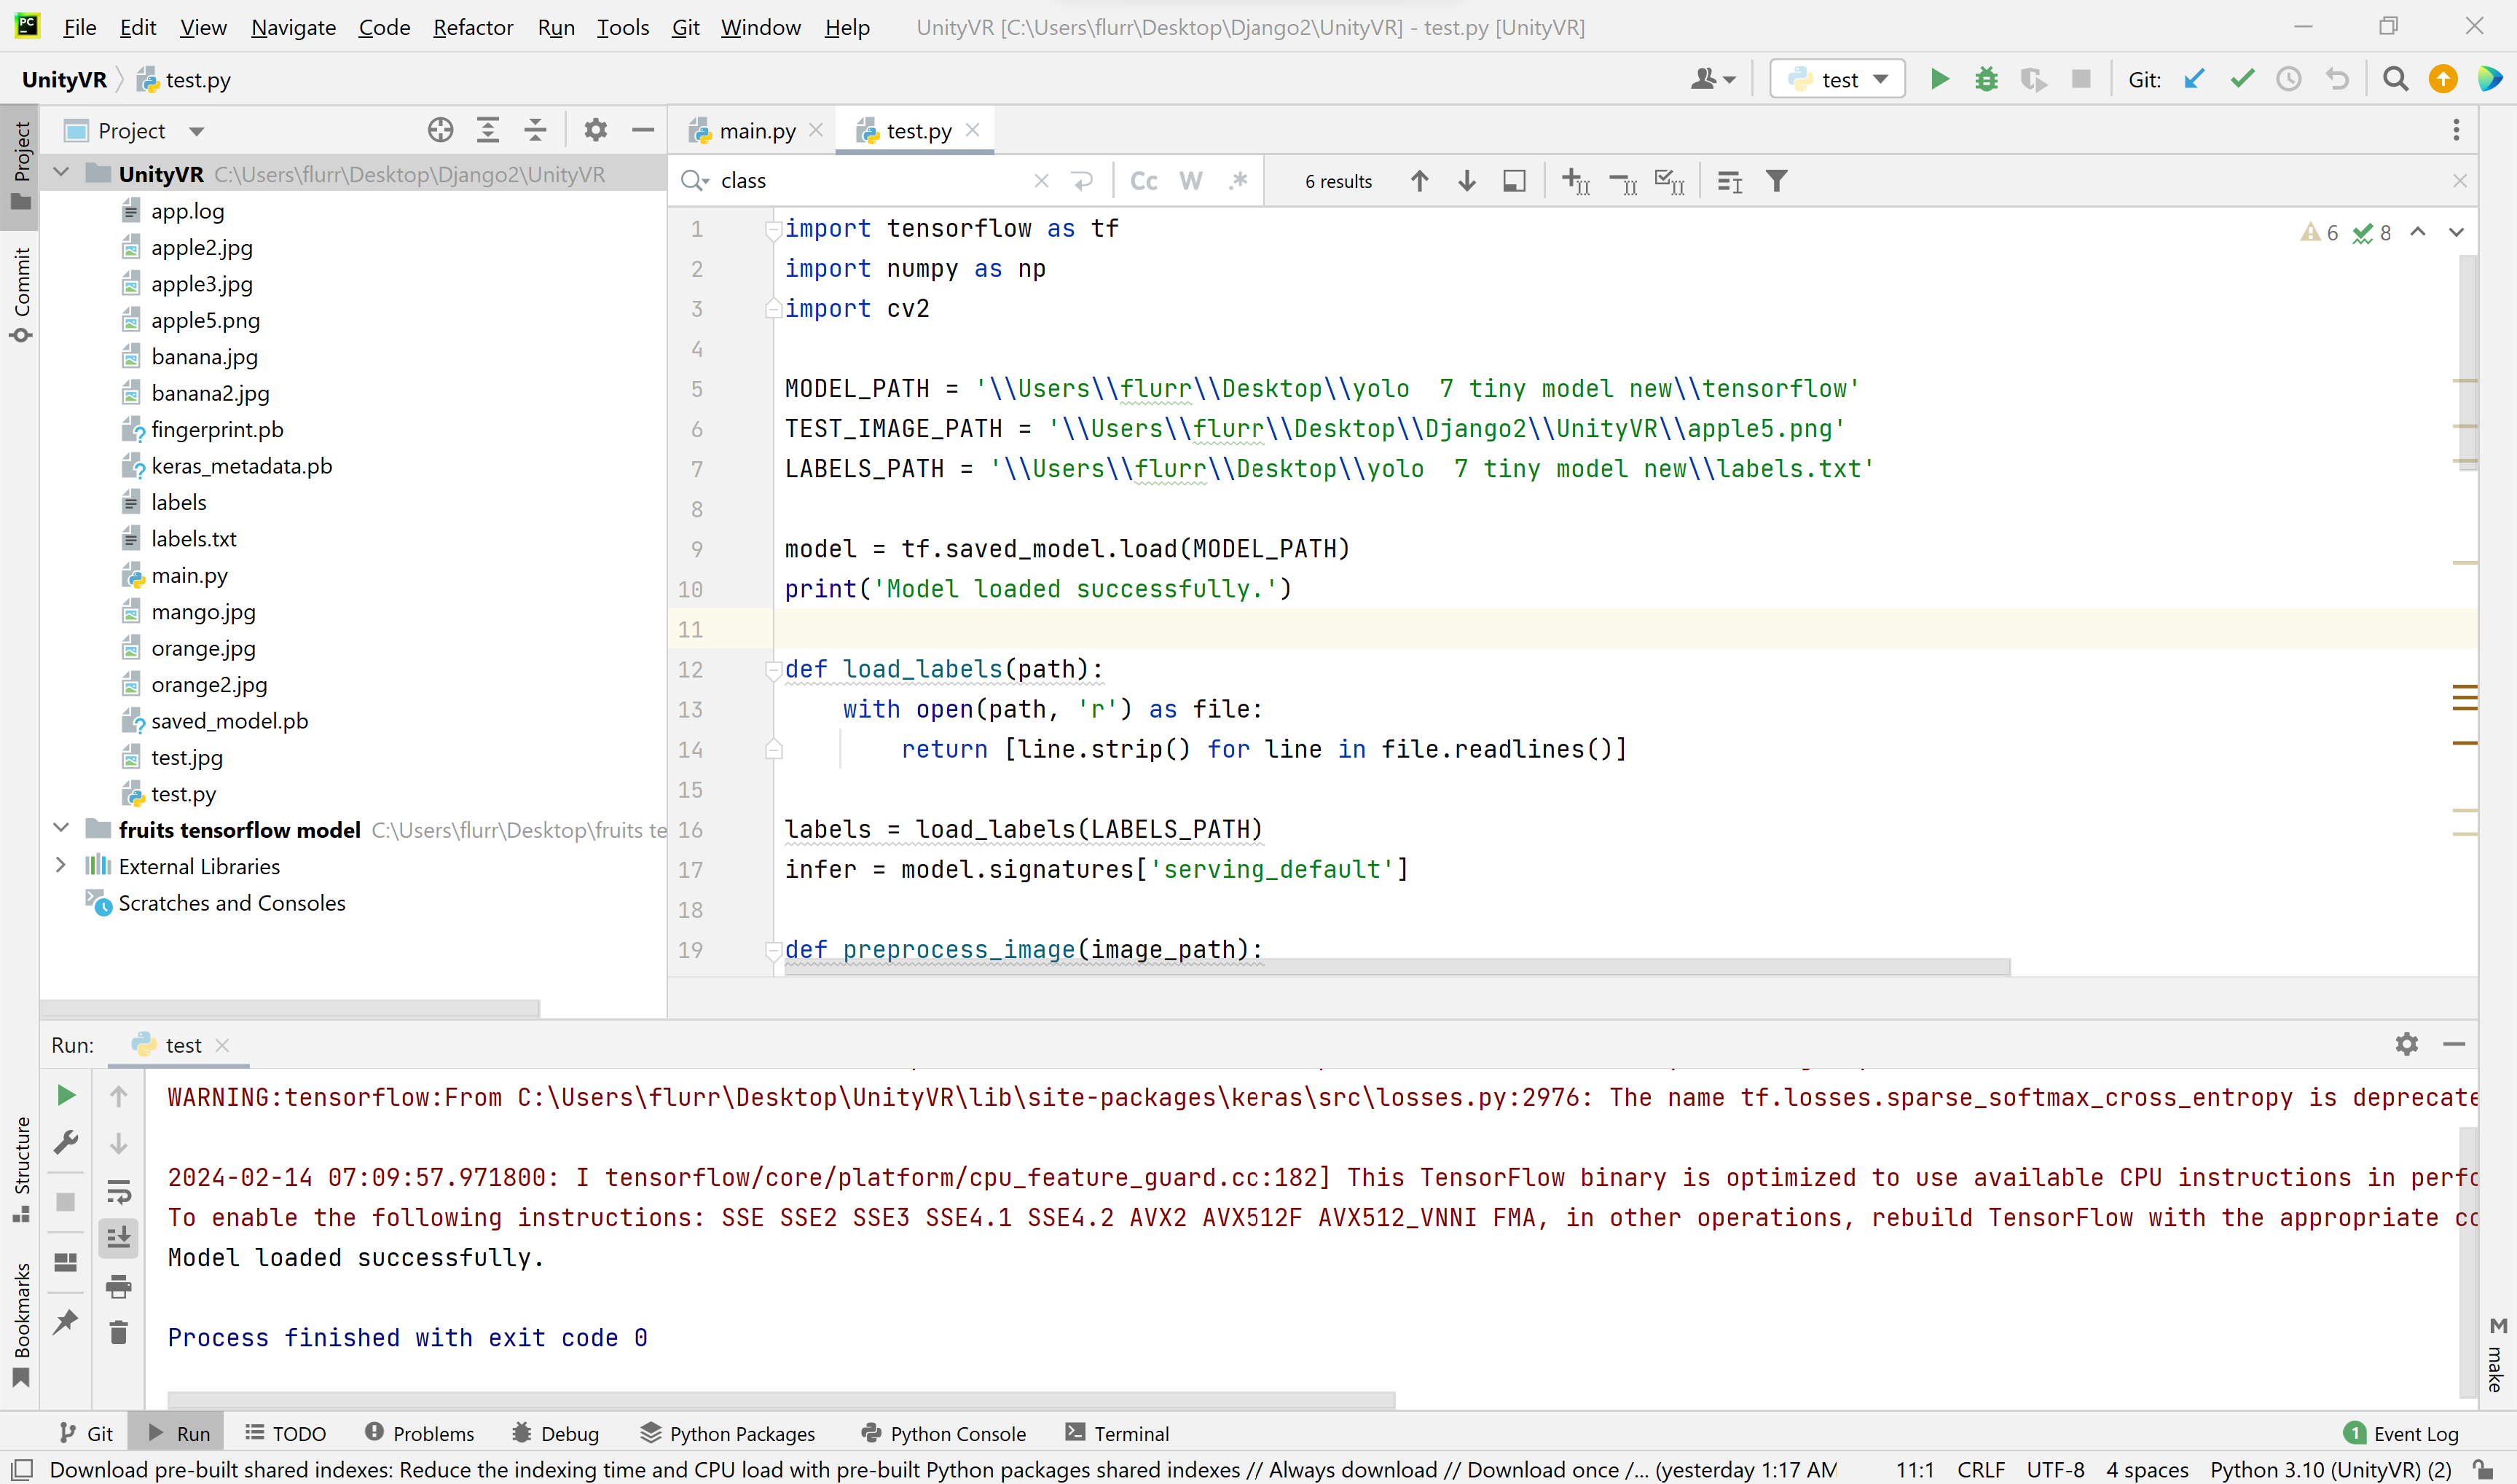

In PyCharm we will be writing the code to load our YOLOv4-Tiny model and build a Flask application allowing for real-time object detection in Unity VR.

The next part of this tutorial will take place in PyCharm.

## Flask

*   Flask is a simple and lightweight Python web framework used to build web applications quickly and with minimal code. It's ideal for beginners due to its ease of use and flexibility, allowing developers to start small and scale up as needed.

*   In the context of object detection, Flask acts as a server that can receive images from clients (like a web browser or a Unity application), process these images using an object detection model, and send back the detection results. It's a convenient tool for creating a bridge between your machine learning model and applications, enabling real-time analysis and response.


Go to **File** > **New** > and select **Python File**

Follow these steps for setting up the Python File

## Script

**IMPORTANT:** depending on the model, things such as input size, input and output tensors, and number of labels will be different!

In [ ]:
from flask import Flask, request, jsonify
import tensorflow as tf
import numpy as np
import cv2

app = Flask(__name__)

# Paths to your model and labels (coco.names
MODEL_PATH = ''
LABELS_PATH = ''

# Load the TensorFlow SavedModel
model = tf.saved_model.load(MODEL_PATH)
print('Model loaded successfully.')

def load_labels(label_path):
    with open(label_path, 'r') as f:
        return [line.strip() for line in f.readlines()]

labels = load_labels(LABELS_PATH)

def preprocess_image_from_memory(filestr):
    npimg = np.frombuffer(filestr, np.uint8)
    image = cv2.imdecode(npimg, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (640, 640))
    image = image.astype(np.float32) / 255.0
    image = np.transpose(image, (2, 0, 1))
    image = np.expand_dims(image, axis=0)
    return image

def detect_with_tensorflow(model, image, labels, confidence_threshold=0.3):
    print("Detecting with TensorFlow model...")
    inputs = {'input': tf.convert_to_tensor(image)}
    outputs = model.signatures['serving_default'](**inputs)
    output_tensor = outputs['output'].numpy()

    predictions = output_tensor.reshape(-1, 5)  # Reshape for easy handling

    detections = []
    for detection in predictions:
        x, y, w, h, confidence = detection
        if confidence > confidence_threshold:
            # Directly use confidence as there are no class probabilities provided
            # Assuming class_id 0 as placeholder since actual class detection logic is not specified
            class_id = 0
            detections.append({'confidence': confidence, 'class_id': class_id})

    # Since actual class identification is not handled due to output format, ensure your labels list has a placeholder label at index 0
    return detections

@app.route('/detect', methods=['POST'])
def detect():
    if 'image' not in request.files:
        return jsonify({"error": "No image part in the request"}), 400

    filestr = request.files['image'].read()
    image = preprocess_image_from_memory(filestr)
    detections = detect_with_tensorflow(model, image, labels, confidence_threshold=0.6)

    results = [{
        "label": labels[detection['class_id']],
        "confidence": float(detection['confidence']),
    } for detection in detections]

    return jsonify({"detections": results})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)


## Flask and TensorFlow Explanation

This document provides a deep dive into the technical details of creating a web-based image detection service using Flask, TensorFlow, and OpenCV. It covers the setup and workings of the Flask web server, the loading and preprocessing of images, the inference process using a pre-trained model, and the response handling.

## **Flask Web Server Initialization**

- **Flask Application**: `app = Flask(__name__)` initializes the Flask application, setting up a web server capable of handling incoming HTTP requests.

## **Model and Labels Loading**

- **Paths Configuration**:
  - `MODEL_PATH` and `LABELS_PATH` are placeholders for filesystem paths to the TensorFlow model and label files, respectively.
- **TensorFlow Model Loading**:
  - `model = tf.saved_model.load(MODEL_PATH)` utilizes TensorFlow's functionality to deserialize and load a pre-trained model from the specified directory.

## **Image Preprocessing**

The `preprocess_image_from_memory` function performs several critical steps to prepare the uploaded image for model inference:

- **Binary to NumPy Array**: Converts the binary image data into a 1D NumPy array of type uint8.
- **Image Decoding**: Uses OpenCV to decode the image into a 3D array representing width, height, and color channels.
- **Color Space Conversion**: Converts the image from BGR to RGB format.
- **Image Resizing**: Resizes the image to 640x640 pixels to match the model's input requirements.
- **Normalization**: Normalizes pixel values to the [0,1] range and changes the data type to float32.
- **Transpose and Batch Dimension**: Rearranges the image dimensions and adds a batch dimension to fit the model's expected input shape.

## **Object Detection Inference**

- **Inference Process**: The preprocessed image tensor is fed into the model to perform object detection, identifying and classifying objects within the image.
- **Output Processing**: The model's output is reshaped and filtered based on a confidence threshold to extract relevant detection results, including bounding boxes and confidence scores.

## **Flask Route and Response Handling**

- **Detection Endpoint**: The `/detect` route accepts POST requests with images, processes those images, and returns object detection results in JSON format.
- **Server Configuration**: Configures the Flask application to run with debugging enabled, accessible over the network on port 5000.

## **Computational Aspects**

- **Preprocessing Steps**: Discusses the computational intensity of image decoding, resizing, and normalization.
- **Model Inference**: Highlights the computational load of the inference process, dependent on the model's complexity and the input resolution.

This detailed technical breakdown elucidates the components and processes involved in setting up a Flask-based web service for image detection, emphasizing computational considerations and the complexities of image processing and inference.


## Running Script

Hit the green **play** button in the top right corner to run the app. In your PyCharm console, you should see that your Flask app is running. Two links will be present. This means your Flask app is successfully launched and ready to accept requests.

copy/store the second link, it should look sometwhat like this:
 **http://192.168.68.116:5000** we will use it in our Unity Code

# Unity

If you haven't already install **Unity 2022** from https://unity.com/download

**Menu Bar**
• Located at the top of the Unity Editor, it contains menus for managing the project and editor settings.
• Includes File, Edit, Assets, GameObject, Component, Window, and Help.

**Toolbar**
• Directly below the Menu Bar, it has tools for scene manipulation (move, rotate, scale), play controls, and layout selection.

**Hierarchy Panel**
• On the left side, it lists all the GameObjects in the current scene. Use it to select, organize, and manage the hierarchy of GameObjects.

**Scene View**
• The large central area where you can visually navigate and manipulate your scene. Interact with GameObjects in a 3D space.

**Game View**
• Usually tabbed with the Scene View, it shows the camera's perspective and allows you to playtest the game inside the editor.

**Inspector Panel**
• On the right side, this panel shows properties and settings for the selected GameObject. Add components and edit properties here.

**Project Panel**
• At the bottom, it functions as the project's file browser. Manage assets like scripts, models, and textures in this panel.

**Console Window**
• Often tabbed with the Project Panel, the Console displays debug messages, warnings, and errors during game development.

**Asset Store/Package Manager** (Not visible in the screenshot)
• Accessible through the Window menu, this feature allows you to browse, purchase, and import assets and packages from the Unity Asset Store or manage packages.

Each component is integral to the development process within Unity, from creating and organizing your game's elements to debugging and refining gameplay.


![Image Description](https://drive.google.com/uc?export=view&id=1e0nBFQHHAix9Sle2zWZ6hhbtQdHE5_af)



In Unity Hub, create a new **3D VR Core** project and name it Tutorial 2.

For an easy Unity VR setup that allows us to focus exclusively on object detection, we will be working in Unity's basic scene within the VR Core project. This scene comes with all the required configurations and dependencies set up, along with premade movement controls for our controllers.

- Navigate to Scenes in your project, and open the **Basic Scene** by clicking on the unity cube icon.
- In the Basic Scene, right-click in an empty area of the project panel, then choose **Create** > **C# Script**.
- Name the newly created C# script **"ContinuousObjectDetection"** by right-clicking on it.
- In the Hierarchy Panel, expand **Complete XR Origin Set Up**, then **XR Origin (XR Rig)**. Finally, drag your **"ContinuousObjectDetection"** script onto the **Main Camera** object.



# Unity code

In [ ]:
using System;
using System.Collections;
using System.Collections.Generic;
using UnityEngine;
using UnityEngine.Networking;
using TMPro; // Ensure this is added to use TextMeshPro

[Serializable]
public class Detection
{
    public float confidence;
    public string label;
}

[Serializable]
public class RootObject
{
    public List<Detection> detections;
}

public class ContinuousObjectDetection : MonoBehaviour
{
    public string serverURL = "address/detect";
    public int captureWidth = 640;
    public int captureHeight = 640;
    public float captureIntervalSeconds = 0.1f;
    private Camera _camera;
    public TextMeshProUGUI detectionResultsText; // Reference to the TextMeshPro component

    void Start()
    {
        _camera = GetComponent<Camera>();
        if (_camera == null)
        {
            Debug.LogError("Camera component not found.");
            return;
        }
        if (detectionResultsText == null)
        {
            Debug.LogError("TextMeshProUGUI component not set.");
            return;
        }
        Debug.Log("Camera found and capture starting.");
        InvokeRepeating(nameof(CaptureAndSend), 2.0f, captureIntervalSeconds);
    }

    void CaptureAndSend()
    {
        Debug.Log("Preparing to capture and send image.");
        StartCoroutine(CaptureAndSendCoroutine());
    }

    IEnumerator CaptureAndSendCoroutine()
    {
        Debug.Log("Inside coroutine, capturing frame.");
        yield return new WaitForEndOfFrame();

        RenderTexture renderTexture = new RenderTexture(captureWidth, captureHeight, 24);
        _camera.targetTexture = renderTexture;
        _camera.Render();

        Texture2D screenShot = new Texture2D(captureWidth, captureHeight, TextureFormat.RGB24, false);
        RenderTexture.active = renderTexture;
        screenShot.ReadPixels(new Rect(0, 0, captureWidth, captureHeight), 0, 0);
        screenShot.Apply();

        byte[] imageData = screenShot.EncodeToJPG();

        _camera.targetTexture = null;
        RenderTexture.active = null;
        Destroy(renderTexture);
        Destroy(screenShot);

        WWWForm form = new WWWForm();
        form.AddBinaryData("image", imageData, "image.jpg", "image/jpeg");

        using (UnityWebRequest www = UnityWebRequest.Post(serverURL, form))
        {
            yield return www.SendWebRequest();

            if (www.result != UnityWebRequest.Result.Success)
            {
                Debug.LogError($"Error sending image: {www.error}");
                UpdateDetectionResults($"Error: {www.error}");
            }
            else
            {
                string jsonResponse = www.downloadHandler.text;
                Debug.Log("Image uploaded successfully!");
                Debug.Log($"Server response: {jsonResponse}");
                ProcessDetections(jsonResponse);
            }
        }
    }

    void ProcessDetections(string jsonResponse)
    {
        RootObject rootObject = JsonUtility.FromJson<RootObject>(jsonResponse);
        if (rootObject != null && rootObject.detections.Count > 0)
        {
            foreach (var detection in rootObject.detections)
            {
                // For displaying the label of the first detection
                UpdateDetectionResults(detection.label);
                break; // This processes only the first detection for simplicity. Remove for multiple detections.
            }
        }
        else
        {
            UpdateDetectionResults("No detections found");
        }
    }

    void UpdateDetectionResults(string text)
    {
        if (detectionResultsText != null)
        {
            detectionResultsText.text = text;
        }
    }
}


## Unity C# Script for Real-Time Object Detection Explanation
This guide delves into the Unity script aimed at capturing images from a Camera component, sending them to an external server for object detection, and displaying the detection results using TextMeshPro. It's tailored for individuals new to Unity, emphasizing Unity-specific components and scripting nuances.

## **Unity Scripting and Components Overview**

Unity scripts control the behavior of GameObjects within the Unity Engine, utilizing a comprehensive API for object manipulation, rendering, physics, and much more.

### **Namespaces**

- `UnityEngine`: The core namespace for accessing Unity's engine functionalities.
- `UnityEngine.Networking`: Contains classes for network operations, crucial for web communications.
- `TMPro`: Namespace for TextMesh Pro, Unity's advanced text rendering system.

### **Serializable Classes for JSON Data**

- **Detection Class**: Represents a detection object with a `confidence` score and a `label`, marked `[Serializable]` for JSON parsing.
- **RootObject Class**: A wrapper for a list of `Detection` objects, facilitating the direct mapping of JSON data to C# objects.

## **Key Components and Their Roles**

### **Camera Component**

- **_camera**: A reference to the Camera component, essential for capturing scenes. The camera's view is rendered into an image and sent for object detection.

### **TextMeshProUGUI Component**

- **detectionResultsText**: A reference to a TextMeshProUGUI component used for displaying detection results on the UI, showcasing advanced text rendering.

## **Script Execution Flow and Unity Specifics**

### **Start Method**

Automatically invoked at script load, it initializes components and starts the `CaptureAndSend` task at fixed intervals with `InvokeRepeating`.

### **CaptureAndSend Coroutine**

A key example of using coroutines for asynchronous operations, including waiting for frame end, capturing the camera's view, and web communications.

#### **Image Capture and Sending**

- Utilizes `RenderTexture` and `Texture2D` to capture and process the camera's view into an image, demonstrating Unity's rendering and texture manipulation capabilities.
- Constructs a `WWWForm` and performs an asynchronous `UnityWebRequest` to send the image to the server, highlighting web communication integration.

### **JSON Response Handling**

Uses `JsonUtility.FromJson<RootObject>` to parse the server's JSON response into structured C# objects, showing Unity's JSON handling support.

### **Updating UI with Detection Results**

Demonstrates interacting with UI elements via TextMeshPro to display detection results, crucial for dynamic and interactive experiences.

## **Conclusion**

This script exemplifies Unity's flexibility for game development and interactive applications, merging real-time image processing, networking, and UI updates. Understanding these components and their interactions provides a foundation for both traditional game development and broader applications within Unity.


Lets start on our code for our **"ContinuousObjectDetection"** C# script to setup object detection in Unity via our Flask server and Yolov4-Tiny

- We also need to attach text that will display our detections on our HUD (heads-up display).
  - **Right-click** on the **Main Camera** object, navigate to **UI > Canvas** to add a new canvas to your scene
  - Click on the **Canvas**, change render mode to **world space** in the **Inspector Panel**
  - **Right-click** on the **Canvas** object, then choose **UI > Text - TextMeshPro** to add a text element.
  - You will have to Orient the text positioning to fit your camera, move around your text object to position infront of your camera, ensure it looks like this:
  ![Image](https://drive.google.com/uc?id=1Pilj3QLh_bb8LbrN49OvbVnlCOKZusud)

  - Align the **Text - TextMeshPro** object near the lower left corner of your screen. This can be done by adjusting the **Pos X** and **Pos Y** values in the **Inspector Panel**. Set the color of the text to something other than white for visibility, Additionally, clear the default "New Text" in the input text section, our text will be dynamic.


Lastly, we need to grant permission for Unity to access our server for YOLOv4-Tiny.

Go to **Edit** > **Project Settings** > **Player**, scroll down, and check the **'Allow unsafe code'** option

## Importing assets

- Within the project panel, right-click on an empty space and click **Import New Asset...**. Import all the assets for our **Converse** 3D model and **New Balance** 3D model.
- Place each sneaker model into the Project Hierarchy on the left. Delete any attached camera object by clicking on the dropdown for the object and deleting the camera.
- Adjust the **Pos Y** to **0.5** for a better view of the object for object detection.
- Next, grab the shoe textures for each shoe and place them onto the appropriate blank shoe model. Drag onto the 3D model in the hierarchy. You might have to click on the dropdown for the 3D model and click directly on the model object inside for adding the texture. Other elements may be there, such as light.


## Controls and running

Controls for navigating the scene are straightforward:

hold and aim the **right** **analog** stick to jump to a location, and snap right or left with the same stick to turn your head. Use the **left** **analog** stick for walking.

Once you have completed all of this, turn on your Oculus VR headset, connect cable to headset and to computer, and hit run!